In [1]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets as dt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
from torch import nn
from torch.nn import functional as F

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


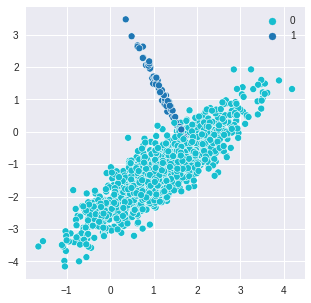

(1500, 2)
(1500,)


In [2]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([1],plt_ind_list):
    X,y = dt.make_classification(
    n_samples=1500, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.95],
    flip_y=0.01, #add noise
    class_sep =1.2,
    random_state=42
)
    palette = {0:"tab:cyan",
               1:"tab:blue", 
               }
    sns.scatterplot(X[:,0],X[:,1], hue = y, palette=palette )

plt.show()

print(X.shape)
print(y.shape)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length
trainset = dataset(X,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [4]:
#defining the network

class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,2)
    self.fc2 = nn.Linear(2,2)
    self.fc3 = nn.Linear(2,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [10]:
#hyper parameters
learning_rate = 0.001
epochs = 1000
# Model , Optimizer, Loss
model = Net(input_shape=X.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum = 0.9)
loss_fn = nn.BCELoss()


In [11]:
print(model)

Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
)


In [12]:
# #forward loop
# losses = []
# accur = []
# for i in range(epochs):
#   for j,(x_train,y_train) in enumerate(trainloader):
    
#     #calculate output
#     output = model(x_train)
 
#     #calculate loss
#     loss = loss_fn(output,y_train.reshape(-1,1))
#     print(output)
#     #accuracy
#     predicted = model(torch.tensor(X,dtype=torch.float32))
#     acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
#     #backprop
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#   if i%50 == 0:
#     losses.append(loss)
#     accur.append(acc)
#     print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

In [13]:
#train the network 

epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    for features, targets in train_loader: 
        output = model.forward(features)
        loss = criterion(output.view(-1), targets.float())
        print(loss)
        #initialize gradient to zero
        optimizer.zero_grad()
        #back propagation
        loss.backward()
        #update weights
        optimizer.step()
    
        losses.append(loss.data.numpy())
#     model.eval()
#     for i in output.data[i]:
#         c = output.data
#         if c>0:
#             c = 1
#         else: 
#             c =0
    
#     train_accuracy = (c==targets).sum().item()/targets.shape[0]
#     print("accuracy:", train_accuracy)
    
    

tensor(0.6945, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6942, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6939, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6933, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6926, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6917, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6906, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6884, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6875, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6857, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6843, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6838, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6820, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6805, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6805, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6786, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6759, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6736, grad_fn=<Bina

tensor(0.4123, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4239, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3985, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4102, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4575, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3964, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4207, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4075, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3942, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4188, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3801, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3666, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4424, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3906, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4156, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3892, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3885, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4267, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4131, grad_fn=<Bina

tensor(0.3045, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3043, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3241, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2836, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3034, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3811, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2827, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3229, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3024, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2818, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3222, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2609, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2402, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3622, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2803, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3209, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2797, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2794, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3407, grad_fn=<Bina

tensor(0.3084, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2832, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2831, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3584, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3331, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2827, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2574, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2573, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2824, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2318, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2569, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3543, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2313, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2818, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2309, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2815, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2052, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1797, grad_fn=<Bina

tensor(0.3198, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2621, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2332, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2332, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2619, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2042, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2329, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3443, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2039, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2327, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2037, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1745, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3193, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2032, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2612, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2030, grad_fn=<Bina

tensor(0.2512, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1883, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1882, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2826, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2511, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2510, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3140, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2509, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2194, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2193, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2508, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1877, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2192, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3410, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1875, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2507, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2190, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1874, grad_fn=<Bina

tensor(0.2112, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1777, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2447, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1441, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1105, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3118, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1775, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2446, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1774, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1774, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2781, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2445, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2445, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3117, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2444, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2108, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2107, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2444, grad_fn=<Bina

tensor(0.2409, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2408, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3463, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3111, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2408, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2056, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2056, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2408, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1704, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2055, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3413, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1703, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2407, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2055, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1702, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2407, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1349, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0997, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3111, grad_fn=<Bina

tensor(0.1655, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2019, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3426, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1654, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2384, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2019, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1654, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2383, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1289, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0923, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1653, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2383, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1652, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1652, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2748, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2383, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2382, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3479, grad_fn=<Bina

tensor(0.1616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2368, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2743, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2367, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2367, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3495, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3119, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2367, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1991, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1991, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2367, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1991, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3442, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1614, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2367, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1990, grad_fn=<Bina

tensor(0.1972, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1972, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2357, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1587, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1972, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1587, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2357, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1971, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1586, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2356, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1201, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0815, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3127, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1586, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2356, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1585, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1585, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2742, grad_fn=<Bina

tensor(0.0779, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3135, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2350, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2742, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2349, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2349, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3529, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3136, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2349, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1956, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1956, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2349, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1956, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3473, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1563, grad_fn=<Bina

tensor(0.3144, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2345, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1945, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1945, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2345, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1546, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1945, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3487, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1546, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2345, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1945, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1545, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2345, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1145, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0746, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3144, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1545, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2345, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1545, grad_fn=<Bina

tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3558, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3153, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1936, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1936, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1530, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1936, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3501, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1530, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1936, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1530, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1124, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0718, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3153, grad_fn=<Bina

tensor(0.1519, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1519, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2750, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3572, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3161, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1929, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1929, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1518, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1929, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3514, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1518, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1929, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1518, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<Bina

tensor(0.3169, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1509, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1509, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1509, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2754, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3584, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3169, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1923, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1923, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1508, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1923, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3525, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1508, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<Bina

tensor(0.0663, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3176, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1500, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1500, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1500, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2757, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3595, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3176, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1919, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1919, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1500, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1919, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3536, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1500, grad_fn=<Bina

tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1071, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0649, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3182, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2760, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3605, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3183, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1916, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1916, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1916, grad_fn=<Bina

tensor(0.1488, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1063, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0638, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3188, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1488, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1488, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1488, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2763, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3614, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3188, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1913, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1913, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1487, grad_fn=<Bina

tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1911, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1483, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1055, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0628, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3193, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1483, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1483, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1483, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2766, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3621, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3194, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1910, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1910, grad_fn=<Bina

tensor(0.2768, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3628, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3198, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1909, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1909, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1909, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3566, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1909, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1049, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0619, grad_fn=<Bina

tensor(0.1907, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1044, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0613, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3202, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2770, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3634, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3202, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1907, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1907, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<Bina

tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1039, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0606, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3206, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2772, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3639, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3206, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1906, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1906, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1472, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1906, grad_fn=<Bina

tensor(0.1905, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1470, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1035, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0601, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3209, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1470, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1470, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1470, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2774, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3644, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3209, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1905, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1905, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<Bina

tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1904, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1468, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1032, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0596, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3212, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1468, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1468, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1468, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2776, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3648, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3212, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1904, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1904, grad_fn=<Bina

tensor(0.3589, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1903, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1029, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0592, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3215, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2777, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3652, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3215, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2340, grad_fn=<Bina

tensor(0.1464, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1026, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0588, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3217, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1464, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1464, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1464, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2779, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3655, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3217, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1902, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1902, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1464, grad_fn=<Bina

tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1902, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1463, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1024, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0585, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3219, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1463, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1463, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1463, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2780, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3658, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3219, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1902, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1902, grad_fn=<Bina

tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1022, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0582, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3221, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2781, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3661, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3221, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<Bina

tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1461, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3600, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1461, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1461, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1020, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0580, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3222, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2782, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2341, grad_fn=<Bina

tensor(0.3224, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3602, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1019, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0577, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3224, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<Bina

tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3604, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1017, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0576, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3225, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2784, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3667, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3225, grad_fn=<Bina

tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3605, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1016, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0574, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3226, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2784, grad_fn=<Bina

tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3670, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3227, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3606, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1015, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0572, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3227, grad_fn=<Bina

tensor(0.3228, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3608, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1014, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0571, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3228, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<Bina

tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3609, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1013, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0570, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3229, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2786, grad_fn=<Bina

tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3610, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1012, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0569, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3229, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2786, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3673, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3230, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2786, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3674, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3230, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3610, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3611, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1011, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0567, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2787, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2787, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3675, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3612, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<Bina

tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3612, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0566, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<Bina

tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0566, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3676, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.3677, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3613, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0565, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0565, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3677, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<Bina

tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3678, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3614, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0564, grad_fn=<Bina

tensor(0.3614, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3678, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3678, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3615, grad_fn=<Bina

tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

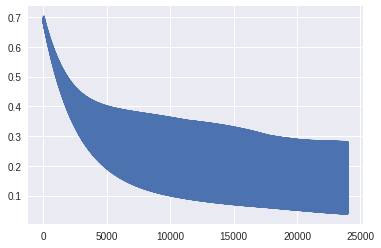

In [9]:
plt.plot(losses)

In [14]:
#plotting the loss
plt.plot(losses.detach().numpy())
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

AttributeError: 'list' object has no attribute 'detach'

In [ ]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [17]:
print(model.fc1.weight)
print(model.fc2.weight)
print(model.fc3.weight)

Parameter containing:
tensor([[ 0.3506, -0.6974],
        [-0.0307, -0.2969]], requires_grad=True)
Parameter containing:
tensor([[-0.1097,  0.1178],
        [-0.5861, -0.4389]], requires_grad=True)
Parameter containing:
tensor([[ 0.0976, -0.0851]], requires_grad=True)


In [18]:
print(model.fc1.bias)
print(model.fc2.bias)
print(model.fc3.bias)

Parameter containing:
tensor([-0.1042,  0.5774], requires_grad=True)
Parameter containing:
tensor([-0.3882, -0.1008], requires_grad=True)
Parameter containing:
tensor([-2.8516], requires_grad=True)
